# Project: Investigate a Dataset (TMdb Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 ### Today i am going to analyze a Dataset as  a project for my Udacity Nanadegree Program.
 ### This data set contains information about 10 thousand movies collected from The Movie Database (TMdb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

#### Question that can analyised from this data set
   1. Which is the movie with most an least profit?
   2. Which Movies Earned Most And Least Revenue?
   3. Which Movies has Largest and Lowest Budget?
   4. Which Movies Ran Most and Least?
   5. How Does Year of Release effect Profitabilty?
   6. Find Most Succesful Genres?
   7. Find Director with Most Movies in dataset?
   8. Most Frequent Cast?
   9. Average Duration Of Movies?
   10. Average Budget Of Movies?
   11. Average Revenue Earned Of Movies?

In [8]:
#import all required package for analysis and visualization
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [9]:
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [10]:
df.shape

(10866, 21)

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

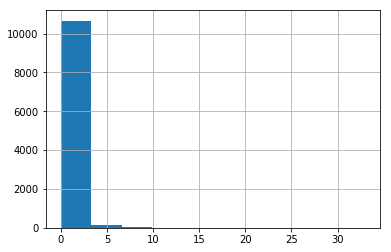

In [13]:
df.popularity.hist()

### Observation From Data Set
> No Unit of Currency Mentioned in the dataset,so lets assume Dollar as it is Hollywood Movies Mostly and DOllar is International Currency Mostly Used.
> Popularity can't be directly conculed based on averafe vote count, as it(vote_count) differs for all movies.

### Data Cleaning (Replacing Or Remove Irrelevant Data From Data Set)
#### Important Note:
1. Removing Irrelevent Column such as id,imdb_id,vote_count.etc.
2. Removing Duplicate Rows.
3. Changing release date column into date format.
4. Replacing Zero with NAN
5. Droping NAN
6. Changing format of budget and revenue.

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Deleting Irrelevent Column
Tmdb_df=df.drop([ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],1)
#See Change
Tmdb_df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [15]:
# Lets See No. of Rows and Column
Tmdb_df.shape

(10866, 10)

In [16]:
# We have 10866 No. of Movie Entries AND 10 Column
# Now Remving Duplicacy in Rows
Tmdb_df.drop_duplicates(keep ='first', inplace=True)
Tmdb_df.shape

(10865, 10)

In [11]:
#now 10865 total entries of movies and 10 no.of columns in it.
# So there was a duplicate row and it has been removed now.
Tmdb_df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [17]:
# Removing Zero's from budget and revenue column
#creating temporary list of budget & revenue
temp_list=['budget', 'revenue']
Tmdb_df[temp_list]=Tmdb_df[temp_list].replace(0,np.NAN)
#Removing all the row which has NaN value
Tmdb_df.dropna(subset= temp_list, inplace=True)
#checking dataset for remaining entries
Tmdb_df.shape

(3854, 10)

In [18]:
# After performing above operation , we now have only 3854 no.of movies.
Tmdb_df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [14]:
# Changing the release date column into standard date format
Tmdb_df.release_date = pd.to_datetime(Tmdb_df['release_date'])

In [19]:
# See the Change
Tmdb_df.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [20]:
# Replacing Zero with NaN in runtime column
Tmdb_df['runtime'] =Tmdb_df['runtime'].replace(0, np.NAN)

In [21]:
# Changing Type of Budget and Revenue data
Tmdb_df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [22]:
#convert type from float to int for both columns
Tmdb_df['budget'] = Tmdb_df['budget'].astype('int64')
Tmdb_df['revenue'] = Tmdb_df['revenue'].astype('int64')

In [23]:
#Checking change
Tmdb_df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, you're ready to move on to exploration. We Will Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1 Which is the movie with most an least profit?

In [24]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#Using Insert Function With Three Parameters
Tmdb_df.insert(2,'gained_profit',Tmdb_df['revenue']-Tmdb_df['budget'])

#previewing the changes in the dataset
Tmdb_df.head(3)

,budget,revenue,gained_profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [25]:
#imporing pretty print module
import pprint
#defining function for Easy Use
def find(col):
    #for Higher value
    high=Tmdb_df[col].idxmax()
    high_details=pd.DataFrame(Tmdb_df.loc[high])
    
    #for Lower value
    low=Tmdb_df[col].idxmin()
    low_details=pd.DataFrame(Tmdb_df.loc[low])
    
    #collection of data in one place
    result=pd.concat([high_details, low_details], axis=1)
    
    return result
#calling our Function
find('gained_profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
gained_profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,12/10/09,12/2/10


> Above Table Shows Id 1386 With Most Profitable Movie And Id 2244 With Least Profitable Movie


### Research Question 2  Which Movies Earned Most And Least Revenue?

In [26]:
# Call find(col) function for this
find('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
gained_profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,12/10/09,11/14/03


> Above Table Shows Id 1386 With Most Earned Revenue And Id 5067 With Least Earned Revenue


### Research Question 3  Which Movies has Largest and Lowest Budget?

In [27]:
# Call find(col) function for this
find('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
gained_profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,12/2/10,4/23/99


> Above Table Shows Id 2244 With Largest Budget And Id 2618 With Lowest Budget


### Research Question 4  Which Movies Ran Most and Least?

In [28]:
# Call find(col) function for this
find('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
gained_profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,5/19/10,6/2/03


> Above Table Shows Id 2107 With Most Runtime And Id 5162 With Least Runtime


### Research Question 4  What is Average Runtime Of Movies?

In [29]:
#Using Inbuilt mean Function
Tmdb_df['runtime'].mean()

109.22029060716139

> So the average runtime a movie is 109 minutes. Lets Visulize it by graphical approach.

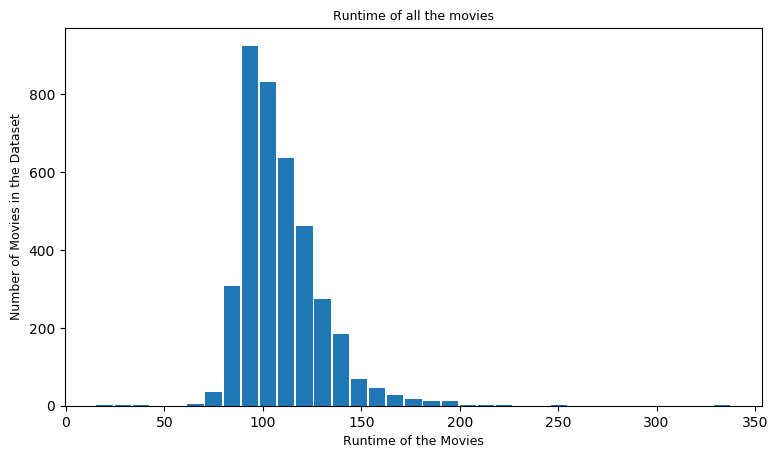

In [30]:
#plot a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 9)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=9)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=9)

#giving a histogram plot
plt.hist(Tmdb_df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

##### The distribution of the above graph is positively skewed! Most of the movies are timed between 80 to 115 minutes.

### Lets analyse more about runtime of the movie using different kind of plots i.e Box Plot and Scatter Plot.

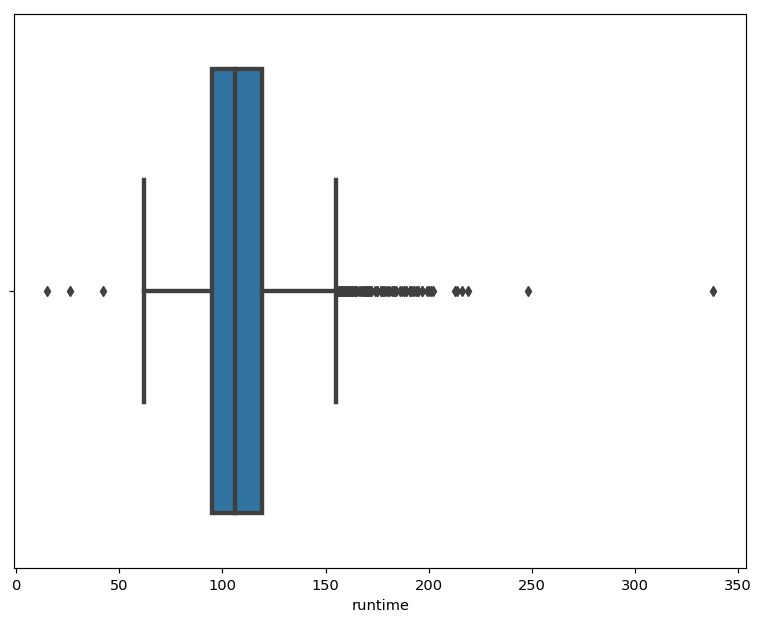

In [31]:
#First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(Tmdb_df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

#### Lets See box-plot first, It gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies.

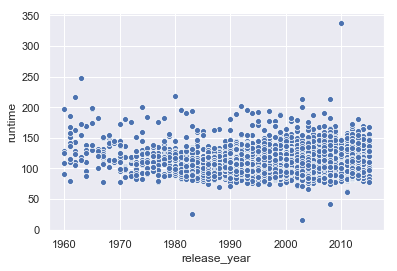

In [46]:
sns.set()
ax = sns.scatterplot(x=Tmdb_df["release_year"], y=Tmdb_df["runtime"])
plt.show()

> Scatter Plot Drawn Between Runtime and Release Year above show spread of distribution.

### Research Question 5 How Does Year of Release effect Profitabilty?

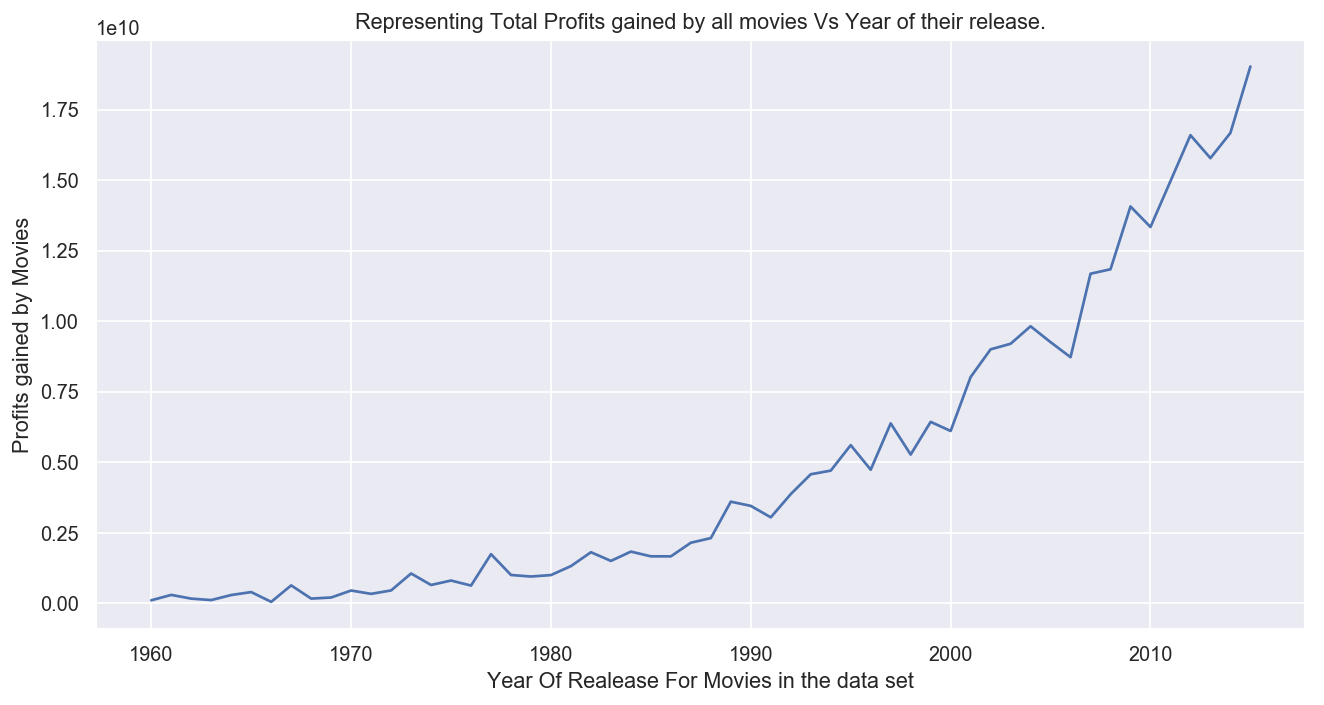

In [38]:
#Lets Use Line Plot For This Analysis
# To FInd Profit of Movies For All Year, Sum Up all the movies of a particular year
yearly_profits= Tmdb_df.groupby('release_year')['gained_profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Year Of Realease For Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits gained by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits gained by all movies Vs Year of their release.')

#plotting the graph
plt.plot(yearly_profits)

#displaying the line plot
plt.show()

In [39]:
#Find Year With Maximum and Minimum Profit
yearly_profits.idxmin()

1966

In [40]:
yearly_profits.idxmax()

2015

> So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.

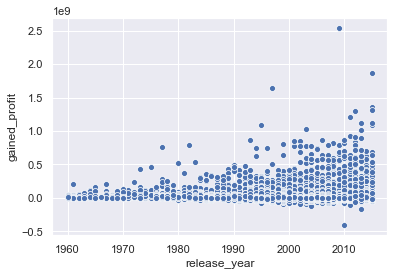

In [53]:
#lets explore more with scatterplot
sns.set()
ax = sns.scatterplot(x=Tmdb_df['release_year'], y=Tmdb_df['gained_profit'])
plt.show()

> Shows relation between release year and profits gained.

## Lets Find Characterstics Of Profitable Movies

### With Respect to Profitable Movies
> Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.

#### So lets fix this amount to 50 million dollar.

In [54]:
#selecting the movies having profit $50M & above
profit_data = Tmdb_df[Tmdb_df['gained_profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,gained_profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [55]:
len(profit_data)

1338

In [56]:
profit_data.describe()

,budget,revenue,gained_profit,runtime,release_year
count,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000,1338.000000
mean,6.044496e+07,2.549577e+08,1.945127e+08,113.667414,2002.357997
std,5.277078e+07,2.341753e+08,2.019087e+08,20.913166,10.639096
min,1.130000e+02,5.152517e+07,5.002009e+07,69.000000,1961.000000
25%,2.200000e+07,1.151022e+08,7.712958e+07,98.000000,1997.000000
50%,4.500000e+07,1.747997e+08,1.240835e+08,110.000000,2005.000000
75%,8.175000e+07,3.056946e+08,2.285696e+08,126.000000,2011.000000
max,3.800000e+08,2.781506e+09,2.544506e+09,216.000000,2015.000000



### Research Question 6 : Find Most Succesful Genres?

In [59]:
#function which will take any column as argument from and keep its track 
def data(col):
    #will take a column, and separate the string by '|'
    data = profit_data[col].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [58]:
#variable for count
count = data('genres')
# See the Values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

#### Lets Visualize Graphically

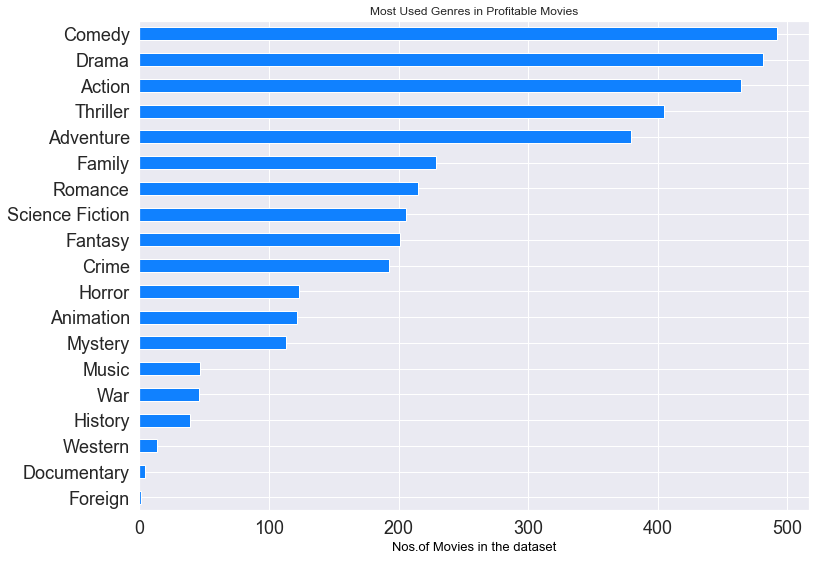

In [60]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
pt = count.plot.barh(color = '#1081FF', fontsize = 18)

#title
pt.set(title = 'Most Used Genres in Profitable Movies')

# on x axis
pt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
pt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Research Question 7 : Find Director with Most Movies in dataset?

In [61]:
#varible to Store data
count=data('director')
#see values
count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

#### Director with Most Movies is Steven Spielberg

### Research Question 8: Most Frequent Cast

In [62]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

#### Tom Cruise is On Top With 27 Time Casted, followed by Brad Pitt.

### Research Question 9: Average Duration Of Movies

In [63]:
profit_data['runtime'].mean()

113.66741405082212

> So the movies having profit of 50 million dollar and more have an average duration of 113 minutes.

### Research Question 10: Average Budget Of Movies

In [64]:
profit_data['budget'].mean()

60444957.76083707

> So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

### Research Question 11: Average Revenue Earned Of Movies

In [65]:
profit_data['revenue'].mean()

254957662.59491777

> So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

# <a id='conclusions'></a>
## Conclusions

> This was a great data Analysis.

#### Some Interesting Facts Found Out From Analysis On Succesful Movie :
1. Average Budget must be around 60 Million Dollar.
2. Average Duration of Movie must be 113 minutes.
3. Genre Must Be: Comedy, Drama, Thriller, Adventure, Action.
4. Anyone of These in Cast: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
5. Get this Director If Possible as he has most movie experience: Steven Spielberg

### By doing all these above the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.

> Limitations: This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.

### References:
  1. https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea7714
  2. https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0